<a href="https://colab.research.google.com/github/Daksh-Aggarwal/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
test_ids=df_test['PassengerId']

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Some Definitions
* **Pclass** - Passenger Class
* **SibSp** - Sibling & Spouse
* **Parch** - Parent & Child

In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Observations
* **177** missing values in **Age** (20% of total values)
* **687** missing values in **Cabin** (77% of total values)
* **2** missing values in **Embarked** (0.22% of total values)
* There are no missing values in other features

In [ ]:
df_train['Age'] = df_train['Age'].fillna(29)

In [ ]:
df_train['Embarked'].value_counts()
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Note
* **Name, Ticket and Cabin** features were dropped from the model training dataset as they seem unrelated to the survival rate.

In [ ]:
df_train_final = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

<Axes: title={'center': 'Passenger Class Distribution'}, ylabel='Number of Passengers'>

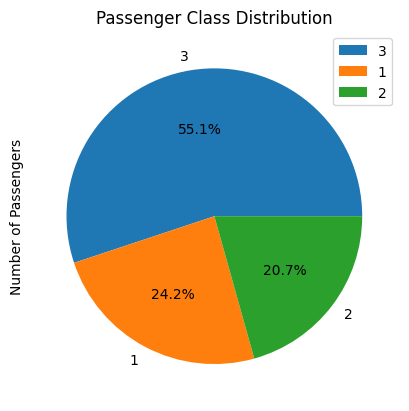

In [ ]:
df_train_final['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Passenger Class Distribution', ylabel='Number of Passengers', legend=True)

<Axes: xlabel='Sex'>

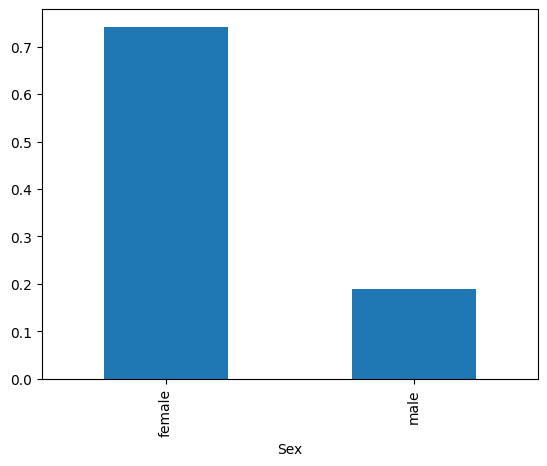

In [ ]:
df_train_final.groupby('Sex')['Survived'].mean().plot(kind='bar')

,Age
Survived,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


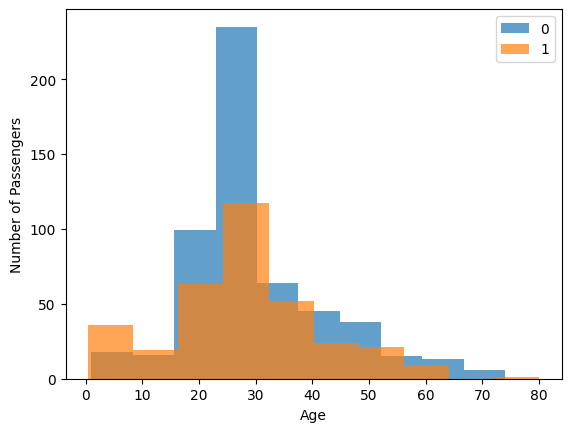

In [ ]:
df_train_final.groupby('Survived')['Age'].plot(kind='hist', alpha=0.7, legend=True, xlabel='Age', ylabel='Number of Passengers')

<Axes: xlabel='Embarked'>

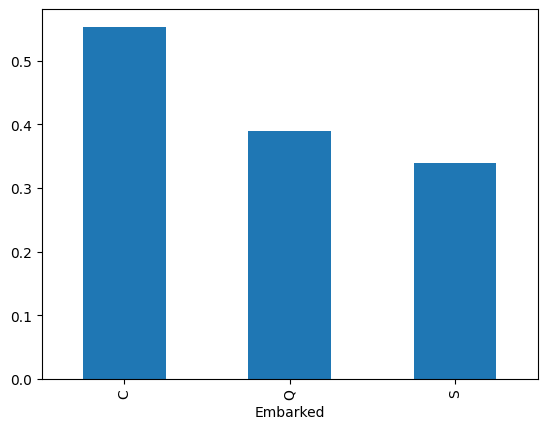

In [ ]:
df_train_final.groupby('Embarked')['Survived'].mean().plot(kind='bar')

##Model Building  And Model Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train_final['Sex'] = le.fit_transform(df_train_final['Sex'])         # male = 1, female = 0
df_train_final['Embarked'] = le.fit_transform(df_train_final ['Embarked'])  # C = 0, Q = 1, S = 2 (for example)


models =[]
models.append(('LR', LogisticRegression(max_iter=100000)))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))


## data classification
x=df_train_final.drop(['Survived'], axis=1)
y=df_train_final['Survived']

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
acc_list=[]
auc_list=[]
cm_list=[]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


for name, model in models:
  model.fit(x,y)
  y_pred=model.predict(x_test)
  acc_list.append(accuracy_score(y_test,y_pred))
  fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_test,y_pred))

In [ ]:
result_dataset=pd.DataFrame({'Model':models, 'Accuracy':acc_list, 'AUC':auc_list, 'Confusion Matrix':cm_list})
result_dataset

,Model,Accuracy,AUC,Confusion Matrix
0,"(LR, LogisticRegression(max_iter=100000))",0.810056,0.80,"[[90, 15], [19, 55]]"
1,"(RF, (DecisionTreeClassifier(max_features='sqr...",1.000000,1.00,"[[105, 0], [0, 74]]"
2,"(DT, DecisionTreeClassifier())",1.000000,1.00,"[[105, 0], [0, 74]]"
3,"(SVM, SVC())",0.636872,0.56,"[[103, 2], [63, 11]]"
4,"(KNN, KNeighborsClassifier())",0.770950,0.74,"[[95, 10], [31, 43]]"
5,"(NB, GaussianNB())",0.776536,0.78,"[[82, 23], [17, 57]]"


##We can see that random tree classifier and decision tree classifier have better accuracy then other models so we gonna use random tree classifer to results for test.csv

In [ ]:
print(df_test.columns)
df_test_final = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test_final['Age'] = df_test_final['Age'].fillna(29)
df_test_final['Fare'].fillna(df_train_final['Fare'].median(), inplace=True)
df_test_final['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})
df_test_final['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print(df_test_final.isnull().sum())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-30-1488524929.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_final['Fare'].fillna(df_train_final['Fare'].median(), inplace=True)


In [ ]:
test_predic=models[1][1].predict(df_test_final)


In [ ]:
df=pd.DataFrame({'PassengerId':test_ids.values, 'Survived':test_predic})

In [ ]:
df.to_csv('submission.csv', index=False)

# Model Evaluation and Performance Visualization

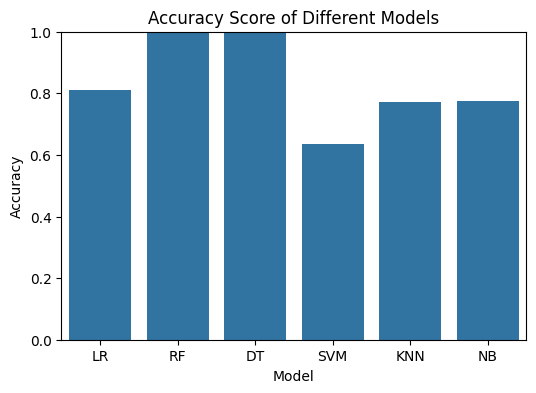

In [ ]:
#Accuracy Comparison
import matplotlib.pyplot as plt
import seaborn as sns
model_names = [name for name, _ in models]


plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=acc_list)
plt.title("Accuracy Score of Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

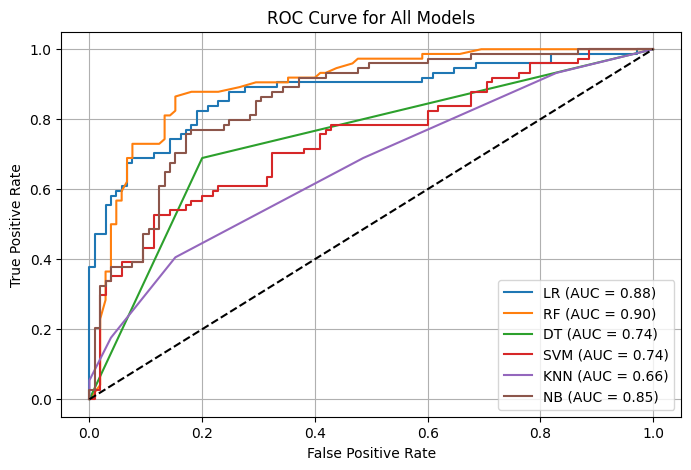

In [ ]:
#ROC Curve for All Models
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for name, model in models:
    model.fit(x_train, y_train)

    y_proba = model.predict_proba(x_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


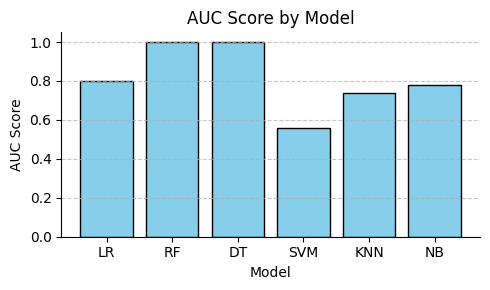

In [ ]:
#AUC Score Comparison
plt.figure(figsize=(5, 3))
plt.bar(model_names, auc_list, color='skyblue', edgecolor='black')

plt.title('AUC Score by Model')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

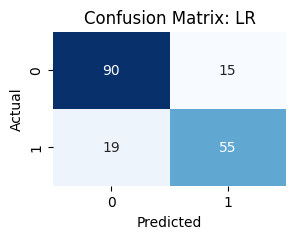

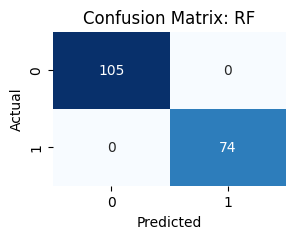

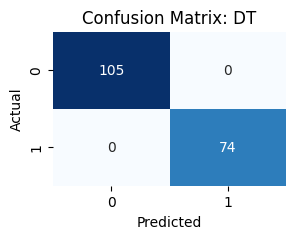

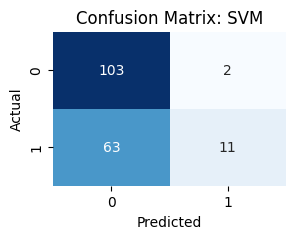

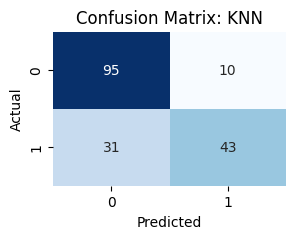

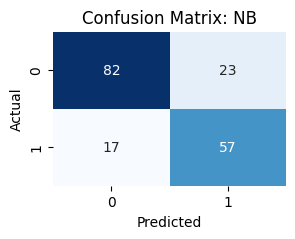

In [ ]:
#Confusion Matrix Analysis
for i in range(len(models)):
    plt.figure(figsize=(3,2))
    sns.heatmap(cm_list[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {models[i][0]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
